In [1]:
import pandas as pd

In [3]:
from ipyfilechooser import FileChooser
from IPython.display import display
# Create a file chooser
fc = FileChooser('data/')
display(fc)

# Button to load the selected file
def load_data(b):
    global df
    data_path = fc.selected
    if data_path:
        df = pd.read_csv(data_path, sep=',', usecols=['Setting', 'Timestamp', 'Channel_0', 'Channel_1', 'Channel_2', 'Channel_3'])
        display(df.head())

fc.register_callback(load_data)

FileChooser(path='D:\code\uom_explore\data', filename='', title='', show_hidden=False, select_desc='Select', c…

,Setting,Timestamp,Channel_0,Channel_1,Channel_2,Channel_3
0,200,516,14200,2662,17623,16690
1,200,1086,12272,2658,17624,16655
2,200,1649,11097,2660,17625,16706
3,200,2217,10340,2617,17624,16696
4,200,2786,9864,2663,17624,16722


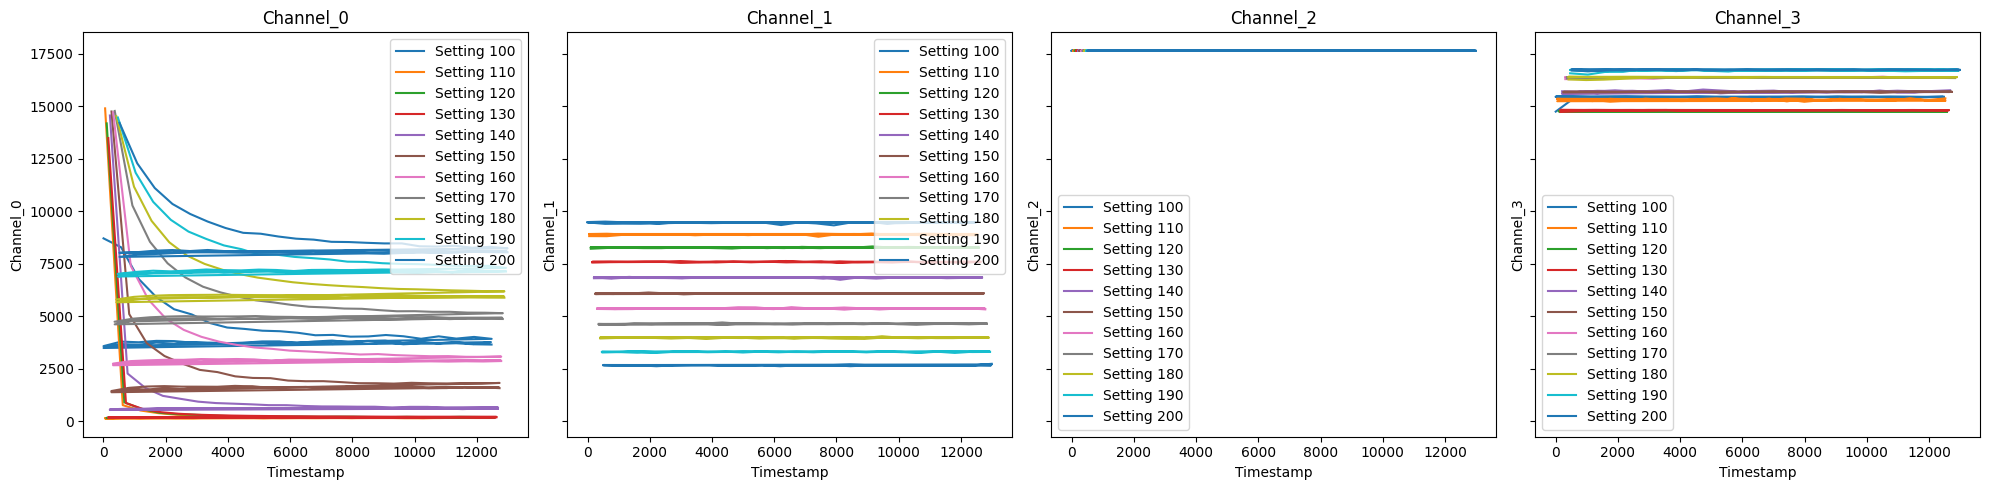

In [4]:
import matplotlib.pyplot as plt
# Group the data by 'Setting'
grouped = df.groupby('Setting')

# Create a figure with subplots (one row, four columns)
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=True, sharey=True)

# Titles for each subplot
channels = ['Channel_0', 'Channel_1', 'Channel_2', 'Channel_3']
for i, channel in enumerate(channels):
    axs[i].set_title(channel)

# Plotting each channel in its subplot
for name, group in grouped:
    for i, channel in enumerate(channels):
        axs[i].plot(group['Timestamp'], group[channel], label=f'Setting {name}')
        axs[i].set_xlabel('Timestamp')
        axs[i].set_ylabel(channel)

# Add legends and adjust layout
for ax in axs:
    ax.legend()

plt.tight_layout()
plt.show()

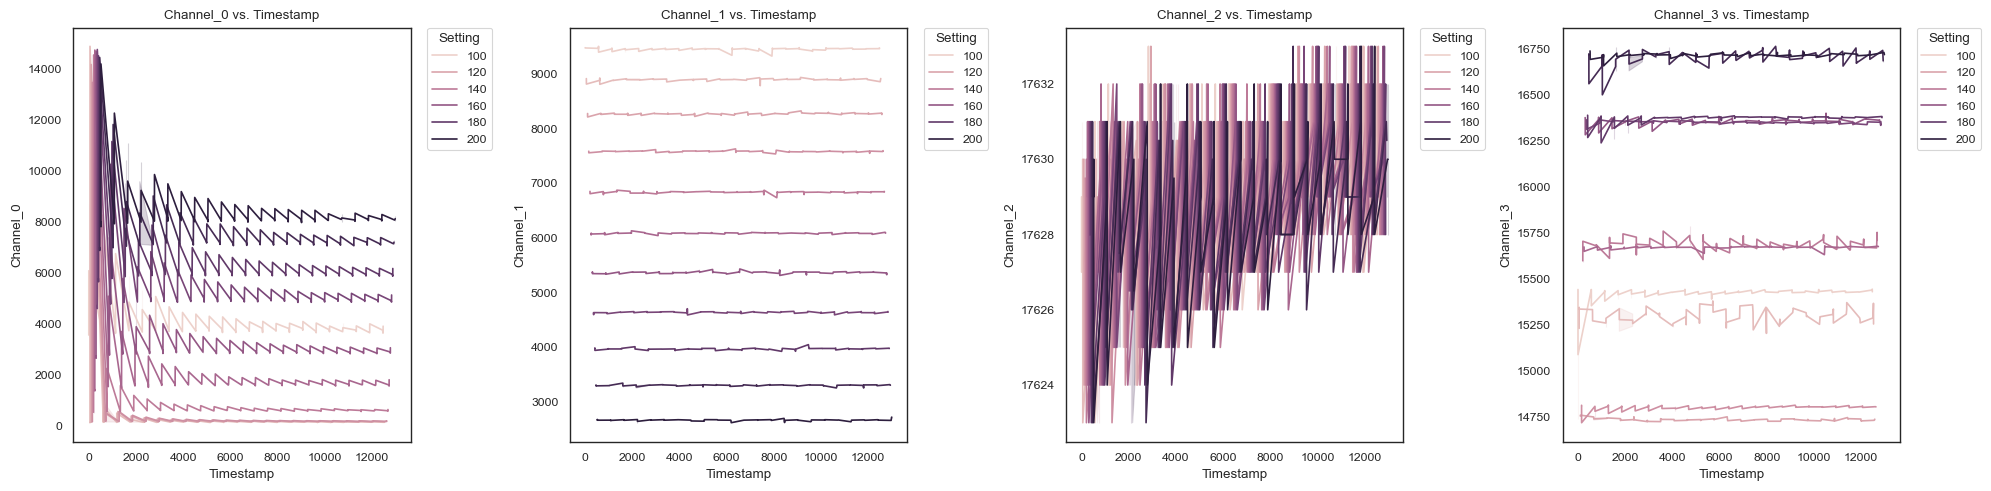

In [5]:
# plot in seaborn
import seaborn as sns


grouped = df.groupby('Setting')

# Define a distinct color palette for 10 categories
palette = sns.color_palette("tab10", 10)

sns.set_theme(style='white', palette=palette, context="paper")
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey=False)

# List of channels to plot
channels = ['Channel_0', 'Channel_1', 'Channel_2', 'Channel_3']

# Plot each channel
for i, channel in enumerate(channels):
    sns.lineplot(data=df, x='Timestamp', y=channel, hue='Setting', ax=axs[i])
    axs[i].set_title(f'{channel} vs. Timestamp')
    axs[i].set_xlabel('Timestamp')
    axs[i].set_ylabel(channel)
    # axs[i].legend(title='Setting', loc='upper right')
    axs[i].legend(title='Setting', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# Adjust layout
plt.tight_layout()
plt.show()